# Solving for the concentration of ligand-homodimer complexes

In [360]:
import sympy

In [3]:
from sympy import Interval, S

In [4]:
from sympy.plotting import plot

Consider a system with ligands in solution with amount concentration $c_\textrm{L}$ and protein monomers embedded in a lipid bilayer with surface amount concentration $\Gamma_\textrm{M}$.
In this system, the ligands can bind up to two monomers simultaneously. We consider both the equilbrium of a monomer binding to a free ligand,

\begin{equation}
    \textrm{M + L ⇌ ML},
\end{equation}

where the dissociation constant is defined as

\begin{equation}
    K_\textrm{D, s} = \frac{\Gamma_\textrm{M} c_\textrm{L}}{\Gamma_\textrm{ML}},
\end{equation}

where $\Gamma_\textrm{ML}$ is the surface amount concentration of monomers bound to a single ligand, and the equilibrium of a monomer binding to an already bound ligand,

\begin{equation}
\textrm{ML + M ⇌ MLM},
\end{equation}

where the dissociation constant is defined as

\begin{equation}
    K_\textrm{D, d} = \frac{\Gamma_\textrm{ML} \Gamma_\textrm{M}}{\Gamma_\textrm{MLM}},
\end{equation}

where $\Gamma_\textrm{MLM}$ is the concentration of the ligand-homodimer complex.

We want an expression for $\Gamma_\textrm{MLM}$ that does not include $\Gamma_\textrm{M}$ or $\Gamma_\textrm{ML}$.
We can use the equation for the mass balance of the protein monomer,

\begin{equation}
    \Gamma_\textrm{M, tot} = \Gamma_\textrm{M} + \Gamma_\textrm{ML} + 2 \Gamma_\textrm{MLM},
\end{equation}

to obtain such an expression.

In [5]:
gamma_M, gamma_Mtot, c_L, gamma_ML, gamma_MLM, K_Dd, K_Ds = sympy.symbols(r"\Gamma_\textrm{M} \Gamma_\textrm{M\,\ tot} c_L \Gamma_\textrm{ML} \Gamma_\textrm{MLM} K_\textrm{D\,\ d} K_\textrm{D\,\ s}", real=True, positive=True)

In [6]:
M_balance = gamma_Mtot - gamma_M - gamma_ML - 2*gamma_MLM

In [7]:
M_balance

\Gamma_\textrm{M, tot} - 2*\Gamma_\textrm{MLM} - \Gamma_\textrm{ML} - \Gamma_\textrm{M}

In [8]:
M_ML_equil = (gamma_M * c_L)/gamma_ML - K_Ds

In [9]:
M_ML_equil

-K_\textrm{D, s} + \Gamma_\textrm{M}*c_L/\Gamma_\textrm{ML}

In [10]:
ML_MLM_equil = (gamma_M * gamma_ML)/gamma_MLM - K_Dd

In [11]:
ML_MLM_equil

-K_\textrm{D, d} + \Gamma_\textrm{ML}*\Gamma_\textrm{M}/\Gamma_\textrm{MLM}

In [12]:
gamma_M_sol = sympy.solveset(M_balance, gamma_M, domain=S.Reals)

In [13]:
gamma_M_sol

{\Gamma_\textrm{M, tot} - 2*\Gamma_\textrm{MLM} - \Gamma_\textrm{ML}}

In [14]:
gamma_M_sol = gamma_M_sol.args[0]

In [15]:
gamma_ML_sol = sympy.solveset(M_ML_equil.subs(gamma_M, gamma_M_sol), gamma_ML, domain=sympy.S.Reals)

In [16]:
gamma_ML_sol

Complement({c_L*(\Gamma_\textrm{M, tot} - 2*\Gamma_\textrm{MLM})/(K_\textrm{D, s} + c_L)}, {0})

In [17]:
gamma_ML_sol = gamma_ML_sol.args[0].args[0]

In [18]:
gamma_ML_sol

c_L*(\Gamma_\textrm{M, tot} - 2*\Gamma_\textrm{MLM})/(K_\textrm{D, s} + c_L)

In [19]:
gamma_MLM_sol = sympy.solveset(ML_MLM_equil.subs([(gamma_M, gamma_M_sol), (gamma_ML, gamma_ML_sol)]), gamma_MLM, domain=S.Reals)

In [20]:
gamma_MLM_sol.args[0].args[1]

sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 8*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(8*K_\textrm{D, s}*c_L) + (K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 4*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(8*K_\textrm{D, s}*c_L)

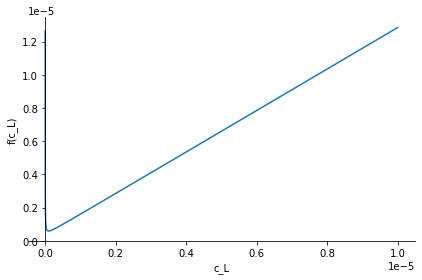

In [21]:
plot(gamma_MLM_sol.args[0].args[1].subs([(K_Dd, 5e-7), (K_Ds, 1e-7), (gamma_Mtot, 1e-7)]), (c_L, 0, 1e-5))

The second solution seems to just diverge to infinity nearly $c_\textrm{L}$, is 0.1 just after, and then increases linearly afterward. I'm not exactly sure how to rigourously dismiss this solution, but the behaviour is non-physical.

In [22]:
gamma_MLM_sol = gamma_MLM_sol.args[0].args[0]

In [23]:
gamma_MLM_sol

-sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 8*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(8*K_\textrm{D, s}*c_L) + (K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 4*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(8*K_\textrm{D, s}*c_L)

In [24]:
sympy.simplify(gamma_MLM_sol)

(-sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 8*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L) + K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 4*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(8*K_\textrm{D, s}*c_L)

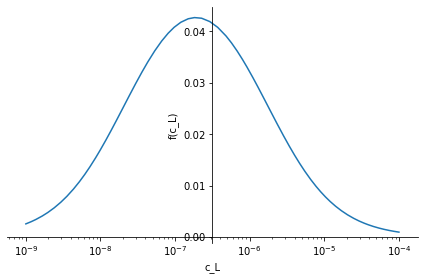

In [62]:
plot(gamma_MLM_sol.subs([(K_Dd, 7.7e-2), (K_Ds, 1.9e-7), (gamma_Mtot, 0.2)]), (c_L, 1e-9, 1e-4), xscale='log')

In [42]:
gamma_MLM_sol_normalized = (gamma_MLM_sol*2/gamma_Mtot).simplify()

In [43]:
gamma_MLM_sol_normalized

(-sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 8*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L) + K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 4*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(4*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)

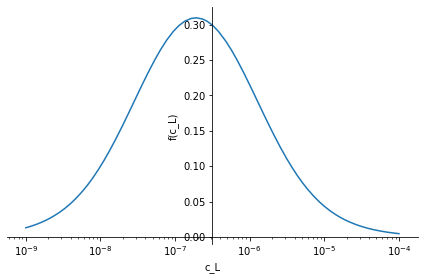

In [63]:
plot(gamma_MLM_sol_normalized.subs([(K_Dd, 7.7e-2), (K_Ds, 1.9e-7), (gamma_Mtot, 1e-1)]), (c_L, 1e-9, 1e-4), xscale='log')

In [64]:
gamma_MLM_sol_normalized.subs(c_L, K_Ds)

(-2*sqrt(K_\textrm{D, d})*K_\textrm{D, s}*sqrt(4*K_\textrm{D, d}*K_\textrm{D, s}**2 + 8*K_\textrm{D, s}**2*\Gamma_\textrm{M, tot}) + 4*K_\textrm{D, d}*K_\textrm{D, s}**2 + 4*K_\textrm{D, s}**2*\Gamma_\textrm{M, tot})/(4*K_\textrm{D, s}**2*\Gamma_\textrm{M, tot})

In [26]:
D_gamma_MLM_D_c_L = sympy.diff(gamma_MLM_sol, c_L)

In [60]:
sympy.solveset(D_gamma_MLM_D_c_L, c_L)

Complement({K_\textrm{D, s}}, {2*sqrt(2)*K_\textrm{D, s}*sqrt(\Gamma_\textrm{M, tot})*sqrt(K_\textrm{D, d} + 2*\Gamma_\textrm{M, tot})/K_\textrm{D, d} - K_\textrm{D, s}*(K_\textrm{D, d} + 4*\Gamma_\textrm{M, tot})/K_\textrm{D, d}})

In [ ]:
D_gamma_MLM_sol_normalized.subs([(K_Dd, 7.7e-2), (K_Ds, 1.9e-7), (gamma_Mtot, 1e-1)]), (c_L, 1e-9, 1e-3)

Now consider the case that some monomers are labelled, $\textrm{M}_\ell$, while others are unlabelled $\textrm{M}_\textrm{u}$.
There are now several more reactions to consider.
For the single monomer-ligand complexes,

\begin{equation}
    \textrm{M}_\ell + \textrm{L} ⇌ \textrm{M}_\ell\\
    \textrm{M}_\textrm{u} + \textrm{L} ⇌ \textrm{M}_\textrm{u},
\end{equation}

where the dissociation constant is defined as

\begin{align}
    K_\textrm{D, s} &= \frac{\Gamma_{\textrm{M}_\ell} c_\textrm{L}}{\Gamma_{\textrm{M}_\ell} \textrm{L}}\\
                    &= \frac{\Gamma_{\textrm{M}_\textrm{u}} c_\textrm{L}}{\Gamma_{\textrm{M}_\textrm{u}}\textrm{L}},
\end{align}

while for the dimers,

\begin{equation}
    \textrm{M}_\ell \textrm{L} + \textrm{M}_\ell ⇌ \textrm{M}_\ell \textrm{L} \textrm{M}_\ell\\
    \textrm{M}_\ell \textrm{L} + \textrm{M}_\textrm{u} ⇌ \textrm{M}_\ell \textrm{L} \textrm{M}_\textrm{u}\\
    \textrm{M}_\textrm{u} \textrm{L} + \textrm{M}_\textrm{u} ⇌ \textrm{M}_\textrm{u} \textrm{L} \textrm{M}_\textrm{u}\\
    \textrm{M}_\textrm{u} \textrm{L} + \textrm{M}_\ell ⇌ \textrm{M}_\textrm{u} \textrm{L} \textrm{M}_\ell,
\end{equation}

where the dissociation constant is defined as

\begin{align}
    K_\textrm{D, d} &= \frac{\Gamma_{\textrm{M}_\ell \textrm{L}} \Gamma_{\textrm{M}_\ell}}{\Gamma_{\textrm{M}_\ell \textrm{L} \textrm{M}_\ell}}\\
                    &= \frac{\Gamma_{\textrm{M}_\ell \textrm{L}} \Gamma_{\textrm{M}_\textrm{u}}}{\Gamma_{\textrm{M}_\ell \textrm{L} \textrm{M}_\textrm{u}}}\\
                    &= \frac{\Gamma_{\textrm{M}_\textrm{u} \textrm{L}} \Gamma_{\textrm{M}_\textrm{u}}}{\Gamma_{\textrm{M}_\textrm{u} \textrm{L} \textrm{M}_\textrm{u}}}\\
                    &= \frac{\Gamma_{\textrm{M}_\textrm{u} \textrm{L}} \Gamma_{\textrm{M}_\ell}}{\Gamma_{\textrm{M}_\ell \textrm{L} \textrm{M}_\textrm{u}}}\\
\end{align}

The mass balance expressions are now

\begin{equation}
    \Gamma_{\textrm{M}_\ell \textrm{, tot}} = \Gamma_{\textrm{M}_\ell} + \Gamma_{\textrm{M}_\ell \textrm{L}} + 2 \Gamma_{\textrm{M}_\ell \textrm{LM}_\ell} + \Gamma_{\textrm{M}_\ell \textrm{LM}_\textrm{u}}\\
    \Gamma_{\textrm{M}_\textrm{u} \textrm{, tot}} = \Gamma_{\textrm{M}_\textrm{u}} + \Gamma_{\textrm{M}_\textrm{u} \textrm{L}} + 2 \Gamma_{\textrm{M}_\textrm{u} \textrm{LM}_\textrm{u}} + \Gamma_{\textrm{M}_\ell \textrm{LM}_\textrm{u}}\\
    \Gamma_{\textrm{M} \textrm{, tot}} = \Gamma_{\textrm{M}_\ell \textrm{, tot}} + \Gamma_{\textrm{M}_\textrm{u} \textrm{, tot}}.
\end{equation}

In [76]:
gamma_Ml = sympy.symbols(r"\Gamma_{\textrm{M}_\ell}")
gamma_MlL = sympy.symbols(r"\Gamma_{\textrm{M}_\ell\textrm{L}}")
gamma_MlLMl = sympy.symbols(r"\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell}")
gamma_Mltot = sympy.symbols(r"\Gamma_{\textrm{M}_\ell\textrm{\,\ tot}}")
gamma_Mu = sympy.symbols(r"\Gamma_{\textrm{M}_\textrm{u}}")
gamma_MuL = sympy.symbols(r"\Gamma_{\textrm{M}_\textrm{u}\textrm{L}}")
gamma_MuLMu = sympy.symbols(r"\Gamma_{\textrm{M}_\textrm{u}\textrm{LM}_\textrm{u}}")
gamma_Mutot = sympy.symbols(r"\Gamma_{\textrm{M}_\textrm{u}\textrm{\,\ tot}}")
gamma_MlLMu = sympy.symbols(r"\Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}}")

In [101]:
Mltot_balance = gamma_Mltot - gamma_Ml - gamma_MlL - 2*gamma_MlLMl - gamma_MlLMu

In [102]:
Mltot_balance

\Gamma_{\textrm{M}_\ell\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}} - \Gamma_{\textrm{M}_\ell\textrm{L}} - \Gamma_{\textrm{M}_\ell}

In [103]:
Mutot_balance = gamma_Mutot - gamma_Mu - gamma_MuL - 2*gamma_MuLMu - gamma_MlLMu

In [104]:
Mutot_balance

-\Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}} + \Gamma_{\textrm{M}_\textrm{u}\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\textrm{u}\textrm{LM}_\textrm{u}} - \Gamma_{\textrm{M}_\textrm{u}\textrm{L}} - \Gamma_{\textrm{M}_\textrm{u}}

In [105]:
Mtot_balance = gamma_Mtot - gamma_Mltot - gamma_Mutot

In [106]:
Mtot_balance

\Gamma_\textrm{M, tot} - \Gamma_{\textrm{M}_\ell\textrm{, tot}} - \Gamma_{\textrm{M}_\textrm{u}\textrm{, tot}}

In [89]:
Ml_L_equil = (gamma_Ml * c_L)/gamma_MlL - K_Ds

In [90]:
Ml_L_equil

-K_\textrm{D, s} + \Gamma_{\textrm{M}_\ell}*c_L/\Gamma_{\textrm{M}_\ell\textrm{L}}

In [91]:
Mu_L_equil = (gamma_Mu * c_L)/gamma_MuL - K_Ds

In [92]:
Mu_L_equil

-K_\textrm{D, s} + \Gamma_{\textrm{M}_\textrm{u}}*c_L/\Gamma_{\textrm{M}_\textrm{u}\textrm{L}}

In [93]:
MlL_Ml_equil = (gamma_Ml * gamma_MlL)/gamma_MlLMl - K_Dd

In [94]:
MlL_Ml_equil

-K_\textrm{D, d} + \Gamma_{\textrm{M}_\ell\textrm{L}}*\Gamma_{\textrm{M}_\ell}/\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell}

In [95]:
MuL_Mu_equil = (gamma_Mu * gamma_MuL)/gamma_MuLMu - K_Dd

In [96]:
MuL_Mu_equil

-K_\textrm{D, d} + \Gamma_{\textrm{M}_\textrm{u}\textrm{L}}*\Gamma_{\textrm{M}_\textrm{u}}/\Gamma_{\textrm{M}_\textrm{u}\textrm{LM}_\textrm{u}}

In [97]:
MlL_Mu_equil = (gamma_Mu * gamma_MlL)/gamma_MlLMu - K_Dd

In [98]:
MlL_Mu_equil

-K_\textrm{D, d} + \Gamma_{\textrm{M}_\ell\textrm{L}}*\Gamma_{\textrm{M}_\textrm{u}}/\Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}}

In [99]:
MuL_Ml_equil = (gamma_Ml * gamma_MuL)/gamma_MlLMu - K_Dd

In [100]:
MuL_Ml_equil

-K_\textrm{D, d} + \Gamma_{\textrm{M}_\ell}*\Gamma_{\textrm{M}_\textrm{u}\textrm{L}}/\Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}}

In [120]:
gamma_Mutot_sol = sympy.solveset(Mutot_balance, gamma_Mutot).args[0]

In [131]:
Mtot_balance_subs = Mtot_balance.subs(gamma_Mutot, gamma_Mutot_sol)

In [132]:
Mtot_balance_subs

\Gamma_\textrm{M, tot} - \Gamma_{\textrm{M}_\ell\textrm{, tot}} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}} - 2*\Gamma_{\textrm{M}_\textrm{u}\textrm{LM}_\textrm{u}} - \Gamma_{\textrm{M}_\textrm{u}\textrm{L}} - \Gamma_{\textrm{M}_\textrm{u}}

In [133]:
gamma_Mu_sol = sympy.solveset(Mtot_balance_subs, gamma_Mu).args[0]

In [135]:
gamma_Mu_sol

\Gamma_\textrm{M, tot} - \Gamma_{\textrm{M}_\ell\textrm{, tot}} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}} - 2*\Gamma_{\textrm{M}_\textrm{u}\textrm{LM}_\textrm{u}} - \Gamma_{\textrm{M}_\textrm{u}\textrm{L}}

In [139]:
Mu_L_equil_subs = Mu_L_equil.subs(gamma_Mu, gamma_Mu_sol)

In [140]:
Mu_L_equil_subs

-K_\textrm{D, s} + c_L*(\Gamma_\textrm{M, tot} - \Gamma_{\textrm{M}_\ell\textrm{, tot}} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}} - 2*\Gamma_{\textrm{M}_\textrm{u}\textrm{LM}_\textrm{u}} - \Gamma_{\textrm{M}_\textrm{u}\textrm{L}})/\Gamma_{\textrm{M}_\textrm{u}\textrm{L}}

In [148]:
gamma_MuL_sol = sympy.solveset(Mu_L_equil_subs, gamma_MuL).args[0].args[0]

In [149]:
gamma_MuL_sol

c_L*(\Gamma_\textrm{M, tot} - \Gamma_{\textrm{M}_\ell\textrm{, tot}} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}} - 2*\Gamma_{\textrm{M}_\textrm{u}\textrm{LM}_\textrm{u}})/(K_\textrm{D, s} + c_L)

In [151]:
MuL_Mu_equil_subs = MuL_Mu_equil.subs([(gamma_Mu, gamma_Mu_sol), (gamma_MuL, gamma_MuL_sol)])

In [152]:
MuL_Mu_equil_subs

-K_\textrm{D, d} + c_L*(\Gamma_\textrm{M, tot} - \Gamma_{\textrm{M}_\ell\textrm{, tot}} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}} - 2*\Gamma_{\textrm{M}_\textrm{u}\textrm{LM}_\textrm{u}})*(\Gamma_\textrm{M, tot} - \Gamma_{\textrm{M}_\ell\textrm{, tot}} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}} - 2*\Gamma_{\textrm{M}_\textrm{u}\textrm{LM}_\textrm{u}} - c_L*(\Gamma_\textrm{M, tot} - \Gamma_{\textrm{M}_\ell\textrm{, tot}} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}} - 2*\Gamma_{\textrm{M}_\textrm{u}\textrm{LM}_\textrm{u}})/(K_\textrm{D, s} + c_L))/(\Gamma_{\textrm{M}_\textrm{u}\textrm{LM}_\textrm{u}}*(K_\textrm{D, s} + c_L))

In [424]:
gamma_MuLMu_sol = sympy.solveset(MuL_Mu_equil_subs, gamma_MuLMu, domain=sympy.S.Reals).args[0]

In [425]:
gamma_MuLMu_sol.args[1].args[0]

-sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 8*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L - 8*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{, tot}}*c_L - 8*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}}*c_L)/(8*K_\textrm{D, s}*c_L) + (K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 4*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L - 4*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{, tot}}*c_L - 4*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}}*c_L)/(8*K_\textrm{D, s}*c_L)

In [426]:
gamma_MuLMu_sol.args[1].args[1]

sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 8*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L - 8*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{, tot}}*c_L - 8*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}}*c_L)/(8*K_\textrm{D, s}*c_L) + (K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 4*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L - 4*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{, tot}}*c_L - 4*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}}*c_L)/(8*K_\textrm{D, s}*c_L)

I'm not sure which one makes sense.

In [427]:
gamma_MuLMu_sol = gamma_MuLMu_sol.args[1].args[1]

In [428]:
gamma_Ml_sol = sympy.solveset(Mltot_balance, gamma_Ml).args[0]

In [429]:
gamma_Ml_sol

\Gamma_{\textrm{M}_\ell\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}} - \Gamma_{\textrm{M}_\ell\textrm{L}}

In [430]:
Ml_L_equil_subs = Ml_L_equil.subs(gamma_Ml, gamma_Ml_sol)

In [431]:
Ml_L_equil_subs

-K_\textrm{D, s} + c_L*(\Gamma_{\textrm{M}_\ell\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}} - \Gamma_{\textrm{M}_\ell\textrm{L}})/\Gamma_{\textrm{M}_\ell\textrm{L}}

In [432]:
gamma_MlL_sol = sympy.solveset(Ml_L_equil_subs, gamma_MlL).args[0].args[0]

In [433]:
gamma_MlL_sol

c_L*(\Gamma_{\textrm{M}_\ell\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}})/(K_\textrm{D, s} + c_L)

In [434]:
MlL_Ml_equil_subs = MlL_Ml_equil.subs([(gamma_Ml, gamma_Ml_sol), (gamma_MlL, gamma_MlL_sol)]) 

In [435]:
MlL_Ml_equil_subs

-K_\textrm{D, d} + c_L*(\Gamma_{\textrm{M}_\ell\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}})*(\Gamma_{\textrm{M}_\ell\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}} - c_L*(\Gamma_{\textrm{M}_\ell\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell} - \Gamma_{\textrm{M}_\ell\textrm{LM}_\textrm{u}})/(K_\textrm{D, s} + c_L))/(\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell}*(K_\textrm{D, s} + c_L))

In [436]:
gamma_MlLMu_sol = sympy.solveset(MlL_Ml_equil_subs, gamma_MlLMu, domain=sympy.S.Reals)

In [437]:
gamma_MlLMu_sol.args[1].args[0]

sqrt(K_\textrm{D, d})*sqrt(\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell})*(K_\textrm{D, s} + c_L)/(sqrt(K_\textrm{D, s})*sqrt(c_L)) + \Gamma_{\textrm{M}_\ell\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell}

In [438]:
gamma_MlLMu_sol.args[1].args[1]

-sqrt(K_\textrm{D, d})*sqrt(\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell})*(K_\textrm{D, s} + c_L)/(sqrt(K_\textrm{D, s})*sqrt(c_L)) + \Gamma_{\textrm{M}_\ell\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell}

Again, not sure which to use.

In [439]:
gamma_MlLMu_sol = gamma_MlLMu_sol.args[1].args[0]

In [440]:
gamma_Ml_sol_subs = gamma_Ml_sol.subs(gamma_MlL, gamma_MlL_sol).subs(gamma_MlLMu, gamma_MlLMu_sol)

In [441]:
gamma_Ml_sol_subs

sqrt(K_\textrm{D, d})*sqrt(\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell})*sqrt(c_L)/sqrt(K_\textrm{D, s}) - sqrt(K_\textrm{D, d})*sqrt(\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell})*(K_\textrm{D, s} + c_L)/(sqrt(K_\textrm{D, s})*sqrt(c_L))

In [442]:
gamma_MuL_sol_subs = gamma_MuL_sol.subs(gamma_MuLMu, gamma_MuLMu_sol).subs(gamma_MlLMu, gamma_MlLMu_sol)

In [443]:
gamma_MuL_sol_subs

c_L*(-sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 8*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L - 8*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{, tot}}*c_L - 8*K_\textrm{D, s}*c_L*(sqrt(K_\textrm{D, d})*sqrt(\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell})*(K_\textrm{D, s} + c_L)/(sqrt(K_\textrm{D, s})*sqrt(c_L)) + \Gamma_{\textrm{M}_\ell\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell}))/(4*K_\textrm{D, s}*c_L) - sqrt(K_\textrm{D, d})*sqrt(\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell})*(K_\textrm{D, s} + c_L)/(sqrt(K_\textrm{D, s})*sqrt(c_L)) + \Gamma_\textrm{M, tot} - 2*\Gamma_{\textrm{M}_\ell\textrm{, tot}} + 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell} - (K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 4*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L - 4*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{, tot}}*c_L - 4*K_\textrm{

In [444]:
MuL_Ml_equil_subs = MuL_Ml_equil.subs([(gamma_Ml, gamma_Ml_sol_subs), (gamma_MuL, gamma_MuL_sol_subs), (gamma_MlLMu, gamma_MlLMu_sol)])

In [445]:
MuL_Ml_equil_subs.simplify()

(sqrt(K_\textrm{D, d})*K_\textrm{D, s}**(3/2)*sqrt(\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell})*(4*sqrt(K_\textrm{D, d})*K_\textrm{D, s}*sqrt(\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell})*c_L*(K_\textrm{D, s} + c_L) + 4*K_\textrm{D, s}**(3/2)*c_L**(3/2)*(-\Gamma_\textrm{M, tot} + 2*\Gamma_{\textrm{M}_\ell\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell}) + sqrt(K_\textrm{D, s})*sqrt(c_L)*(sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 - 8*sqrt(K_\textrm{D, s})*sqrt(c_L)*(sqrt(K_\textrm{D, d})*sqrt(\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell})*(K_\textrm{D, s} + c_L) + sqrt(K_\textrm{D, s})*sqrt(c_L)*(\Gamma_{\textrm{M}_\ell\textrm{, tot}} - 2*\Gamma_{\textrm{M}_\ell\textrm{LM}_\ell})) + 8*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L - 8*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{, tot}}*c_L) + K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D,

In [446]:
gamma_MlLMl_sol = sympy.solveset(MuL_Ml_equil_subs, gamma_MlLMl, domain=sympy.S.Reals)

In [390]:
#gamma_MlLMl_sol.args[0].args[1].args[0]
gamma_MlLMl_sol.args[1].args[0].args[0]

Reals

In [388]:
#gamma_MlLMl_sol.args[0].args[1].args[0]
gamma_MlLMl_sol.args[1].args[1].args[0]

-sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 8*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{, tot}}*c_L)/(8*K_\textrm{D, s}*c_L) + (K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 4*K_\textrm{D, s}*\Gamma_{\textrm{M}_\ell\textrm{, tot}}*c_L)/(8*K_\textrm{D, s}*c_L)

In [460]:
gamma_MLM_sol

-sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 8*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(8*K_\textrm{D, s}*c_L) + (K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 4*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(8*K_\textrm{D, s}*c_L)

I can't display the full solution, but this is the only one that seems reasonable, as it agrees with the expression derived before with no unlabeled monomers (many of the other solutions have imaginary parts). However, it also has no dependence at all on the fraction of unlabeled monomers, which does imply that you can just use the simple effective concentration approach.

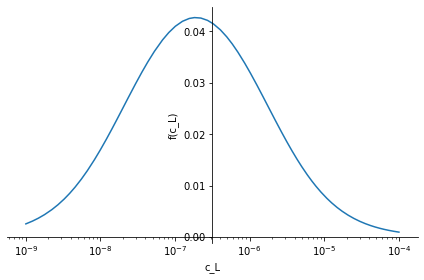

In [387]:
plot(gamma_MlLMl_sol.args[1].args[1].args[0].subs([(K_Dd, 7.7e-2), (K_Ds, 1.9e-7), (gamma_Mtot, 0.2), (gamma_Mltot, 0.2)]), (c_L, 1e-9, 1e-4), xscale='log')

In [456]:
sympy.N(gamma_MlLMl_sol.args[1].args[1].subs([(K_Dd, 7.7e-2), (K_Ds, 1.9e-7), (gamma_Mtot, 0.2), (gamma_Mltot, 0.2), (c_L, 1.9e-7)]))

{0.0426759424778934, 0.234324057522107}

In [369]:
sympy.N(gamma_MLM_sol.subs([(K_Dd, 7.7e-2), (K_Ds, 1.9e-7), (gamma_Mtot, 0.2), (c_L, 1.9e-7)]))

0.0426759424778934

For the answers that are real numbers, using the either solution for gamma_MlLMu doesn't seem to matter.
The real number expression itself is the same for either of the solutions for gamma_MuLMu.

In [461]:
(gamma_MLM_sol.subs(gamma_Mtot, gamma_Mltot) - gamma_MlLMl_sol.args[1].args[1].args[0]).simplify()

0